Coursera Google Advanced Data Analytics

Course 4 The Power of Statistics

Module 2 Probability

Work with probability distributions in Python


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [3]:
education_districtwise = pd.read_csv("/content/education_districtwise.csv")

<Axes: >

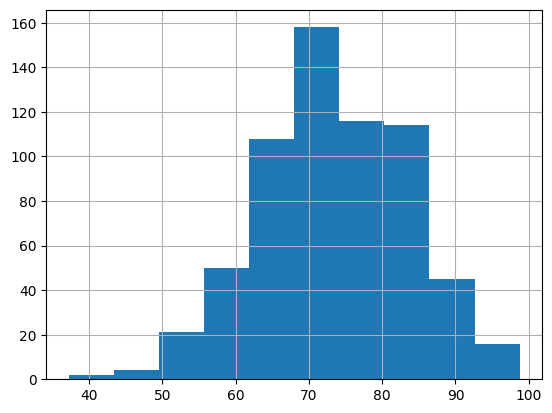

In [4]:
education_districtwise['OVERALL_LI'].hist()

 The x-axis of your plot refers to the literacy rate of each district, and the y-axis refers to count or to the number of districts.

 The histogram shows that the distribution of your literacy rate data is bell-shaped and symmetric about the mean.

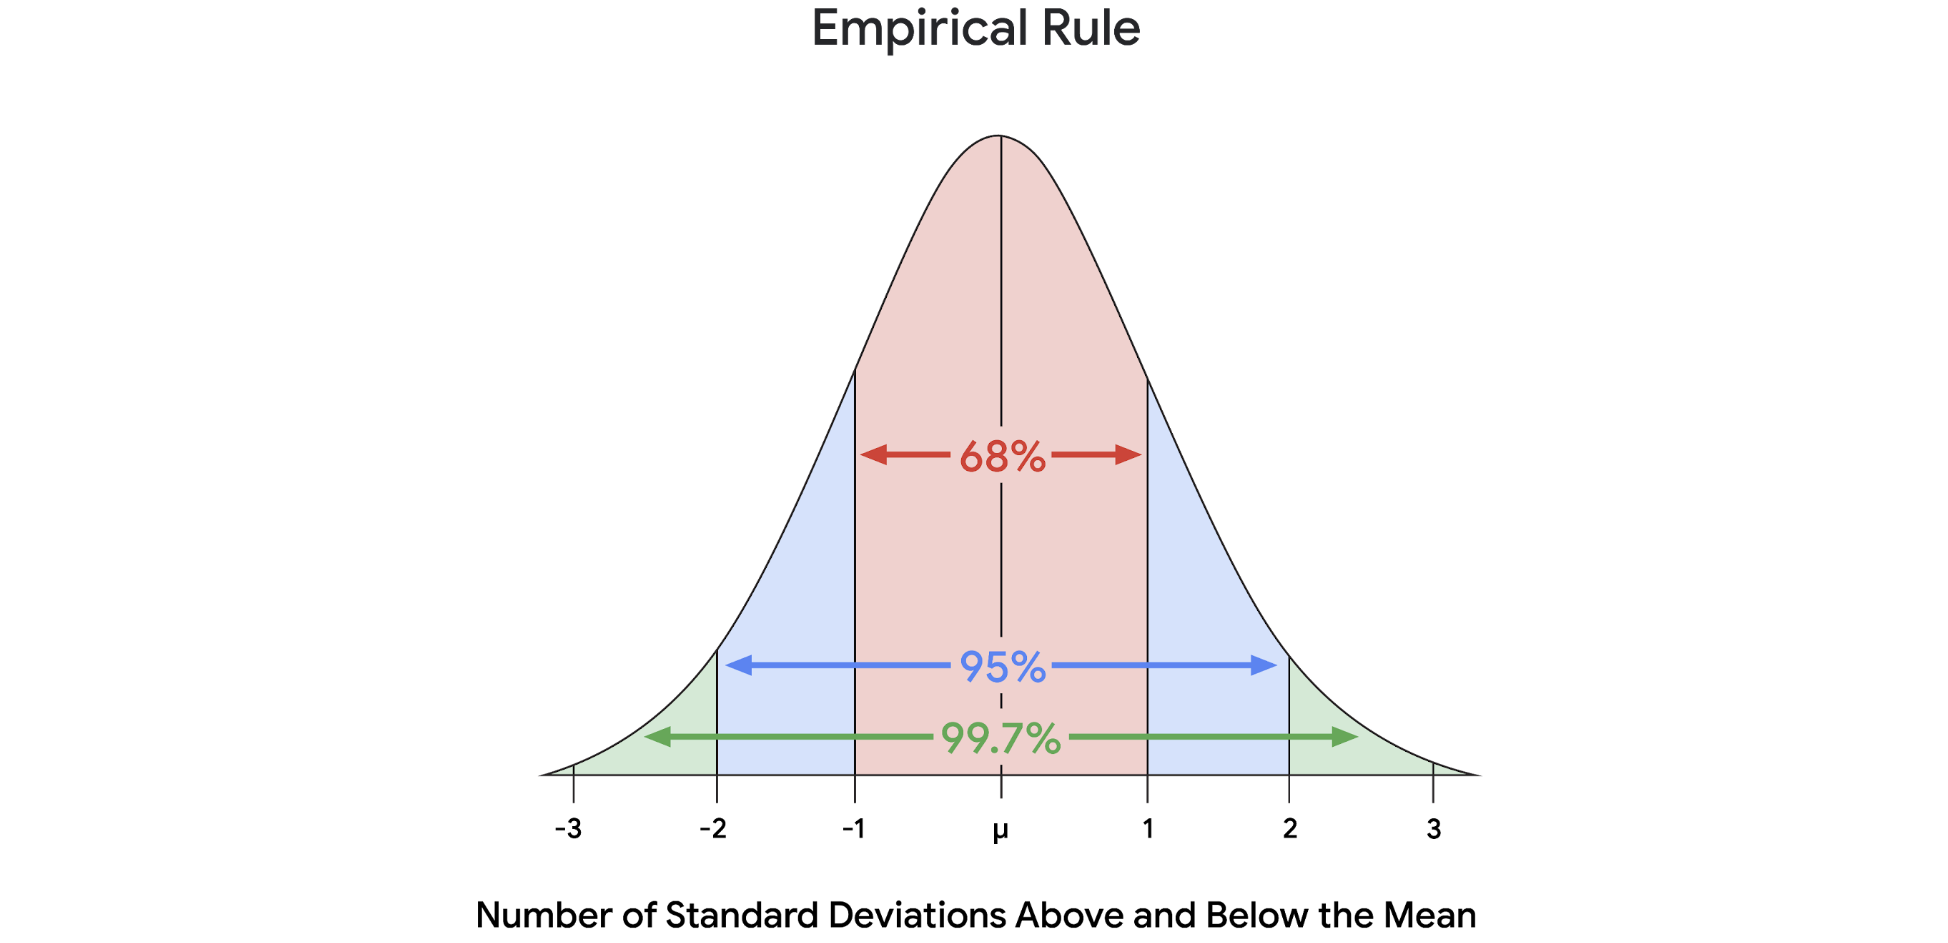

Image from Google Advanced Data Analytics

In [6]:
mean_overall_li = education_districtwise['OVERALL_LI'].mean()
mean_overall_li

73.39518927444796

The mean district literacy rate is about 73.4 percent.

In [7]:
std_overall_li = education_districtwise['OVERALL_LI'].std()
std_overall_li

10.098460413782469

The standard deviation is about 10 percent.

In [8]:
upper_limit = mean_overall_li + 1 * std_overall_li
lower_limit = mean_overall_li - 1 * std_overall_li
((education_districtwise['OVERALL_LI'] >= lower_limit) & (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()

0.6191176470588236

 The output shows you that about 0.619 or 61.9 percent of your district literacy rates fall within one standard deviation of the mean.

In [9]:
upper_limit = mean_overall_li + 2 * std_overall_li
lower_limit = mean_overall_li - 2 * std_overall_li
((education_districtwise['OVERALL_LI'] >= lower_limit) & (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()

0.8897058823529411

 About 0.900 or 90.0 percent of your values fall within two standard deviations of the mean

In [10]:
upper_limit = mean_overall_li + 3 * std_overall_li
lower_limit = mean_overall_li - 3 * std_overall_li
((education_districtwise['OVERALL_LI'] >= lower_limit) & (education_districtwise['OVERALL_LI'] <= upper_limit)).mean()

0.9294117647058824

About 0.929 or 92.9 percent of your values fall within three standard deviations of the mean.

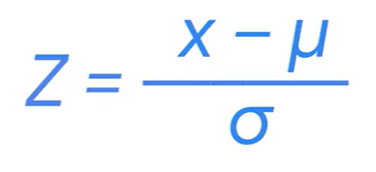

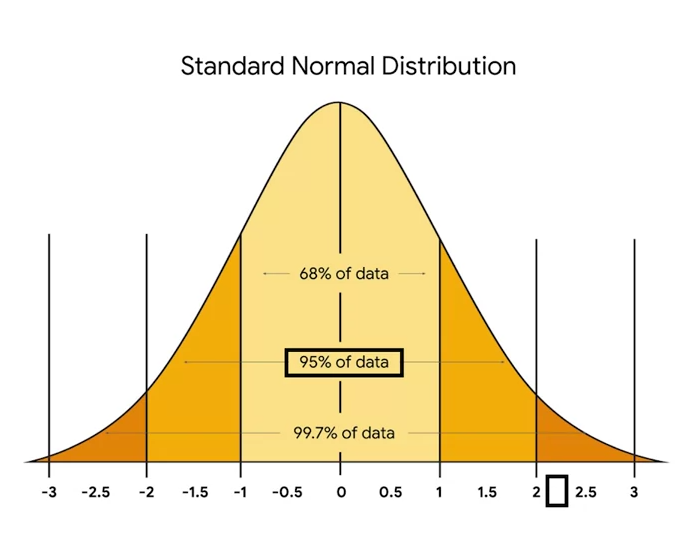

Image from Google Advanced Data Analytics

To find outliers in your data, first create a new column called Z_SCORE that includes the Z-scores for each district literacy rate in your dataset.

In [19]:
education_districtwise['Z_SCORE'] = stats.zscore(education_districtwise['OVERALL_LI'])
education_districtwise

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Z_SCORE
0,DISTRICT32,STATE1,13,391,104,875564.0,66.92,NaN
1,DISTRICT649,STATE1,18,678,144,1015503.0,66.93,NaN
2,DISTRICT229,STATE1,8,94,65,1269751.0,71.21,NaN
3,DISTRICT259,STATE1,13,523,104,735753.0,57.98,NaN
4,DISTRICT486,STATE1,8,359,64,570060.0,65.00,NaN
...,...,...,...,...,...,...,...,...
675,DISTRICT522,STATE29,37,876,137,5296396.0,78.05,NaN
676,DISTRICT498,STATE29,64,1458,230,4042191.0,56.06,NaN
677,DISTRICT343,STATE29,59,1117,216,3483648.0,65.05,NaN
678,DISTRICT130,STATE29,51,993,211,3522644.0,66.16,NaN


Check for missing values in the column and handle them before computing the Z-scores. For example:

In [20]:
education_districtwise['OVERALL_LI'].isnull().sum()

46

filling with dropping rows:

In [21]:
education_districtwise = education_districtwise.dropna(subset=['OVERALL_LI'])

In [23]:
education_districtwise['Z_SCORE'] = stats.zscore(education_districtwise['OVERALL_LI'])
education_districtwise

<ipython-input-23-75b76f6d0f88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education_districtwise['Z_SCORE'] = stats.zscore(education_districtwise['OVERALL_LI'])


,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Z_SCORE
0,DISTRICT32,STATE1,13,391,104,875564.0,66.92,-0.641712
1,DISTRICT649,STATE1,18,678,144,1015503.0,66.93,-0.640721
2,DISTRICT229,STATE1,8,94,65,1269751.0,71.21,-0.216559
3,DISTRICT259,STATE1,13,523,104,735753.0,57.98,-1.527694
4,DISTRICT486,STATE1,8,359,64,570060.0,65.00,-0.831990
...,...,...,...,...,...,...,...,...
675,DISTRICT522,STATE29,37,876,137,5296396.0,78.05,0.461307
676,DISTRICT498,STATE29,64,1458,230,4042191.0,56.06,-1.717972
677,DISTRICT343,STATE29,59,1117,216,3483648.0,65.05,-0.827035
678,DISTRICT130,STATE29,51,993,211,3522644.0,66.16,-0.717030


In [25]:
education_districtwise[(education_districtwise['Z_SCORE'] > 3) | (education_districtwise['Z_SCORE'] < -3)]

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Z_SCORE
434,DISTRICT461,STATE31,4,360,53,532791.0,42.67,-3.044964
494,DISTRICT429,STATE22,6,612,62,728677.0,37.22,-3.585076


 The literacy rates in these two districts are more than three standard deviations below the overall mean, which means they have unusually low rates.